In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('data/combined_cleaned_data/combined_with_fe.csv')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4588\1822130159.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined_cleaned_data/combined_with_fe.csv')


,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_clean,sentiment
0,0,0,5,True,"09 24, 2013",A3CZ890UHC8HHZ,B0009RF9DW,{'Size:': ' 6.6 oz'},Amazon Customer,"It diffuses a very mild light perfume, just wh...",What I expected,1379980800,NaN,NaN,wear mild perfume nice strong lotion day perfu...,Positive
1,1,1,5,False,"07 12, 2014",A125TMC44CJBKK,B0012Y0ZG2,{'Size:': ' B-020'},Mustang Shelly,All time favorite!!!! Wish they still carried ...,Five Stars,1405123200,NaN,NaN,time still favorite carry wish,Positive
2,2,2,5,True,"12 28, 2014",A3JDSBP01M7R2R,B0012Y0ZG2,{'Size:': ' 112'},Tim A. Brooks,One of my wife's favorites.,Five Stars,1419724800,NaN,NaN,one favorites wife's,Positive
3,3,3,5,True,"03 3, 2014",A2HT5WENL8E5S6,B000FI4S1E,NaN,Shasta Masser,If you have body acne this product is a must. ...,Acne Body Wash A MUST,1393804800,NaN,NaN,heal help within prevent already first wash mu...,Positive
4,4,4,5,False,"11 7, 2014",A7LAYX9R7IMOO,B0012Y0ZG2,{'Size:': ' 123'},andre luiz,I really is what I expected,Five Stars,1415318400,NaN,NaN,expect really,Positive


In [25]:
df.drop(df.columns[[0, 1]], axis = 1, inplace=True)

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_clean,sentiment
0,5,True,"09 24, 2013",A3CZ890UHC8HHZ,B0009RF9DW,{'Size:': ' 6.6 oz'},Amazon Customer,"It diffuses a very mild light perfume, just wh...",What I expected,1379980800,NaN,NaN,wear mild perfume nice strong lotion day perfu...,Positive
1,5,False,"07 12, 2014",A125TMC44CJBKK,B0012Y0ZG2,{'Size:': ' B-020'},Mustang Shelly,All time favorite!!!! Wish they still carried ...,Five Stars,1405123200,NaN,NaN,time still favorite carry wish,Positive
2,5,True,"12 28, 2014",A3JDSBP01M7R2R,B0012Y0ZG2,{'Size:': ' 112'},Tim A. Brooks,One of my wife's favorites.,Five Stars,1419724800,NaN,NaN,one favorites wife's,Positive
3,5,True,"03 3, 2014",A2HT5WENL8E5S6,B000FI4S1E,NaN,Shasta Masser,If you have body acne this product is a must. ...,Acne Body Wash A MUST,1393804800,NaN,NaN,heal help within prevent already first wash mu...,Positive
4,5,False,"11 7, 2014",A7LAYX9R7IMOO,B0012Y0ZG2,{'Size:': ' 123'},andre luiz,I really is what I expected,Five Stars,1415318400,NaN,NaN,expect really,Positive


In [5]:
df.dtypes

overall            int64
verified            bool
reviewTime        object
reviewerID        object
asin              object
style             object
reviewerName      object
reviewText        object
summary           object
unixReviewTime     int64
vote              object
image             object
review_clean      object
sentiment         object
dtype: object

In [6]:
df. isnull(). sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             30781
reviewerName         10
reviewText           48
summary              16
unixReviewTime        0
vote              61097
image             71755
review_clean        241
sentiment             0
dtype: int64

In [26]:
df.dropna(subset=['reviewText', 'review_clean'], inplace=True)

In [8]:
df. isnull(). sum()

overall               0
verified              0
reviewTime            0
reviewerID            0
asin                  0
style             30688
reviewerName          9
reviewText            0
summary              15
unixReviewTime        0
vote              60857
image             71525
review_clean          0
sentiment             0
dtype: int64

In [27]:
df.drop(['reviewTime', 'asin', 'style', 'reviewerName', 'unixReviewTime', 'vote', 'image'], axis=1, inplace=True)

In [6]:
df['review_clean']

0        wear mild perfume nice strong lotion day perfu...
1                           time still favorite carry wish
2                                     one favorites wife's
3        heal help within prevent already first wash mu...
4                                            expect really
                               ...                        
73619    think guide go acela maybe i've realize star t...
73620                                                 good
73621                         great quality price good job
73622    point else sense code point good make worked g...
73623    reason buy buy something madden great already ...
Name: review_clean, Length: 73383, dtype: object

In [7]:
import matplotlib.pyplot as plt
from textblob import Word
import wordcloud

In [109]:
# common_words=''
# for i in df.review_clean:
#     i = str(i)
#     tokens = i.split()
#     common_words += " ".join(tokens)+" "
# wordcloud = wordcloud.WordCloud().generate(common_words)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [110]:
# df["sentiment"].value_counts()

In [111]:
# df = pd.DataFrame({'mood':['Positive', 'Negative'], 'val':[df["sentiment"].value_counts()[0], df["sentiment"].value_counts()[1]]})
# ax = df.plot.bar(x='mood', y='val', rot=0, color=['green', 'red'], legend=False)
# ax.xaxis.label.set_color('yellow')
# ax.tick_params(axis='x', colors='yellow')
# ax.yaxis.label.set_color('yellow')
# ax.tick_params(axis='y', colors='yellow')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Encoded the target column
lb=LabelEncoder()
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [13]:
df.head()

,overall,verified,reviewerID,reviewText,summary,review_clean,sentiment
0,5,True,A3CZ890UHC8HHZ,"It diffuses a very mild light perfume, just wh...",What I expected,wear mild perfume nice strong lotion day perfu...,1
1,5,False,A125TMC44CJBKK,All time favorite!!!! Wish they still carried ...,Five Stars,time still favorite carry wish,1
2,5,True,A3JDSBP01M7R2R,One of my wife's favorites.,Five Stars,one favorites wife's,1
3,5,True,A2HT5WENL8E5S6,If you have body acne this product is a must. ...,Acne Body Wash A MUST,heal help within prevent already first wash mu...,1
4,5,False,A7LAYX9R7IMOO,I really is what I expected,Five Stars,expect really,1


In [30]:
from keras.preprocessing.text import Tokenizer

In [31]:
from nltk.tokenize import word_tokenize 

In [32]:
df.review_clean = df.review_clean.astype(str)

In [17]:
df.head()

,overall,verified,reviewerID,reviewText,summary,review_clean,sentiment
0,5,True,A3CZ890UHC8HHZ,"It diffuses a very mild light perfume, just wh...",What I expected,wear mild perfume nice strong lotion day perfu...,1
1,5,False,A125TMC44CJBKK,All time favorite!!!! Wish they still carried ...,Five Stars,time still favorite carry wish,1
2,5,True,A3JDSBP01M7R2R,One of my wife's favorites.,Five Stars,one favorites wife's,1
3,5,True,A2HT5WENL8E5S6,If you have body acne this product is a must. ...,Acne Body Wash A MUST,heal help within prevent already first wash mu...,1
4,5,False,A7LAYX9R7IMOO,I really is what I expected,Five Stars,expect really,1


In [18]:
df.dtypes

overall          int64
verified          bool
reviewerID      object
reviewText      object
summary         object
review_clean    object
sentiment        int32
dtype: object

In [10]:
df.review_clean = df.review_clean.astype(str)

In [51]:
df2 = df.sample(n = 30000)

In [33]:
corpus = df['review_clean'].tolist()

In [52]:
corpus2 = df2['review_clean'].tolist()

In [68]:
corpus

['wear mild perfume nice strong lotion day perfumes shalimar want light want diffuse lotion purchasing hint',
 'time still favorite carry wish',
 "one favorites wife's",
 'heal help within prevent already first wash must body week use chest acne product difference notice back reoccurring',
 'expect really',
 'well great lather smell',
 'give italy day year transform beautiful spent spa soon hard treat experience take cream find disappointed since fragrance feel must smooth like say get dear word shower live friend buy skin use one ago try completely love luxurious relax',
 "seven product plastic fading lavendar heat amount quite scent natural quantity resealable potency sell delicate however dry decant oil smell stain come product think presentation open strike concentrate aspect generous important location overbear review enough opening seem intrinsic something careful note make act different packet mine potent sachet extract good long find spill fairly cloy really jar bag help messy 

In [118]:
type(corpus)

list

In [16]:
features = (df.review_clean.str.split(expand=True).stack().value_counts() > 1500).value_counts()
features

False    73074
True       225
dtype: int64

In [44]:
features[1]

607

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(max_features=1500)       # taking 500 unique words by highest frequency

In [19]:
# X = tfidf.fit_transform(corpus).toarray()
# y = df.iloc[:, -1].values

In [36]:
X = tfidf.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [48]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.69096545,
        0.        ],
       [0.        , 0.        , 0.47647222, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.65897468],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
print(X.dtype)
print(y.dtype)

float64
int32


In [127]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
print(X.size)
print(y.size)

7500000
30000


In [15]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [24]:
max_features = features[1].item()

In [60]:
type(max_features)

int

In [37]:
from keras.preprocessing.sequence import pad_sequences

In [38]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['review_clean'].values)
X = tokenizer.texts_to_sequences(df['review_clean'].values)
X = pad_sequences(X)

In [26]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 661, 128)          256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 661, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(49166, 661) (49166, 2)
(24217, 661) (24217, 2)


In [28]:
pd.get_dummies(df['sentiment']).values.shape

(73383, 2)

In [29]:
X.shape

(73383, 661)

In [30]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [32]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
1537/1537 - 92s - loss: 0.3286 - accuracy: 0.8661 - 92s/epoch - 60ms/step
Epoch 2/10
1537/1537 - 91s - loss: 0.2705 - accuracy: 0.8884 - 91s/epoch - 59ms/step
Epoch 3/10
1537/1537 - 90s - loss: 0.2559 - accuracy: 0.8956 - 90s/epoch - 58ms/step
Epoch 4/10
1537/1537 - 90s - loss: 0.2434 - accuracy: 0.9007 - 90s/epoch - 59ms/step
Epoch 5/10
1537/1537 - 90s - loss: 0.2322 - accuracy: 0.9053 - 90s/epoch - 59ms/step
Epoch 6/10
1537/1537 - 90s - loss: 0.2226 - accuracy: 0.9106 - 90s/epoch - 59ms/step
Epoch 7/10
1537/1537 - 91s - loss: 0.2116 - accuracy: 0.9151 - 91s/epoch - 59ms/step
Epoch 8/10
1537/1537 - 90s - loss: 0.2016 - accuracy: 0.9196 - 90s/epoch - 59ms/step
Epoch 9/10
1537/1537 - 91s - loss: 0.1909 - accuracy: 0.9250 - 91s/epoch - 59ms/step
Epoch 10/10
1537/1537 - 91s - loss: 0.1809 - accuracy: 0.9296 - 91s/epoch - 59ms/step


In [33]:
model.save('model2.hdf5')

In [2]:
import tensorflow as tf
import keras

In [3]:
new_model = tf.keras.models.load_model('model2.hdf5')

In [9]:
loss = [0.3286, 0.2705, 0.2559, 0.2434, 0.2322, 0.2226, 0.2116, 0.2016, 0.1909, 0.1809]
acc = [0.8661, 0.8884, 0.8956, 0.9007, 0.9053, 0.9106, 0.9151, 0.9196, 0.9250, 0.9296]
epoch = [i for i in range(1,11)]

In [13]:
import matplotlib.pyplot as plt

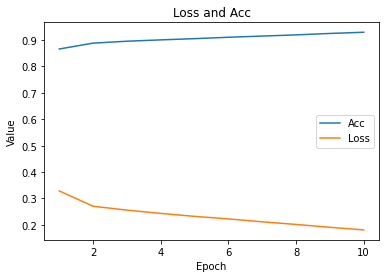

In [21]:
plt.plot(epoch, acc, label="Acc")
plt.plot(epoch, loss, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title('Loss and Acc')
plt.legend(loc="right")
plt.show()

In [43]:
validation_size = 1500
batch_size = 32
X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = new_model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

664/664 - 29s - loss: 0.3170 - accuracy: 0.8862 - 29s/epoch - 44ms/step
score: 0.32
acc: 0.89


In [44]:
import numpy as np

In [46]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = new_model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 305ms/epoch - 305ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 35ms/epoch - 35ms/step
1/1 - 0s - 36ms/epoch - 36ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 34ms/epoch - 34ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 31ms/epoch - 31ms/step
1/1 - 0s - 36ms/epoch - 36ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 32ms/epoch - 32ms/step
1/1 - 0s - 33ms/epoch - 33ms/step
1/1 - 0s - 3